<a href="https://colab.research.google.com/github/ppijbb/NLP_study/blob/main/%EA%B0%9C%EC%B2%B4%EB%AA%85%EC%9D%B8%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 라이브러리 설치 및 텐서보드연결 

데이터 다운로드

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!wget https://dumps.wikimedia.org/kowiki/latest/kowiki-latest-pages-articles.xml.bz2 -P ./ #네이버 영화 말뭉치

!wget https://github.com/e9t/nsmc/raw/master/ratings.txt -P ./ #한국어 위키피디아
!wget https://github.com/e9t/nsmc/raw/master/ratings_train.txt -P ./
!wget https://github.com/e9t/nsmc/raw/master/ratings_test.txt -P ./

!wget https://korquad.github.io/dataset/KorQuAD_v1.0_train.json -P ./ #KorQuAD
!wget https://korquad.github.io/dataset/KorQuAD_v1.0_dev.json -P ./

!wget https://github.com/songys/Question_pair/raw/master/kor_pair_train.csv -P ./ #유사문장
!wget https://github.com/songys/Question_pair/raw/master/kor_Pair_test.csv -P ./
          
!gdrive_download 1Few7-Mh3JypQN3rjnuXD8yAXrkxUwmjS ./

--2020-03-30 01:02:30--  https://dumps.wikimedia.org/kowiki/latest/kowiki-latest-pages-articles.xml.bz2
Resolving dumps.wikimedia.org (dumps.wikimedia.org)... 208.80.154.7, 2620:0:861:1:208:80:154:7
Connecting to dumps.wikimedia.org (dumps.wikimedia.org)|208.80.154.7|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 663870976 (633M) [application/octet-stream]
Saving to: ‘./kowiki-latest-pages-articles.xml.bz2’

kowiki-latest-pages 100%[===================>] 633.12M  4.39MB/s    in 2m 26s  

2020-03-30 01:05:02 (4.33 MB/s) - ‘./kowiki-latest-pages-articles.xml.bz2’ saved [663870976/663870976]

--2020-03-30 01:05:03--  https://github.com/e9t/nsmc/raw/master/ratings.txt
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/e9t/nsmc/master/ratings.txt [following]
--2020-03-30 01:05:03--  https://raw.githubuse



```
function gdrive_download() {  #ratsgo blog
  CONFIRM=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate "https://docs.google.com/uc?export=download&id=$1" -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')
  wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$CONFIRM&id=$1" -O $2
  rm -rf /tmp/cookies.txt
}
```



In [ ]:
!bash preprocess.sh process-nsmc  #받은 데잍 전처리
!bash preprocess.sh process-wiki
!bash preprocess.sh process-korquad
!bash preprocess.sh dump-processed
!bash preprocess.sh dump-tokenized

bash: preprocess.sh: No such file or directory
bash: preprocess.sh: No such file or directory
bash: preprocess.sh: No such file or directory
bash: preprocess.sh: No such file or directory
bash: preprocess.sh: No such file or directory


In [ ]:
!kaggle competitions list
!kaggle competitions download -c elo-merchant-category-recommendation
!apt-get update
!apt-get install g++ openjdk-8-jdk
!pip install konlpy
!pip install nltk
!apt-get install fonts-nanum*
!apt-get install fontconfig
!fc-cache -fv
!cp /usr/share/fonts/truetype/nanum/Nanum* /usr/local/lib/python3.6/dist-packages/matplotlib/mpl-data/fonts/ttf/
!rm -rf /content/.cache/matplotlib/*
!pip install seqeval
!pip uninstall tf_keras_contrib
!sudo pip install git+https://www.github.com/keras-team/keras-contrib.git

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
Get:1 http://security.

텐서보드 연결

In [ ]:
LOG_DIR = 'drive/data/tb_logs'
	
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip
	
import os
if not os.path.exists(LOG_DIR):
  os.makedirs(LOG_DIR)
	  
get_ipython().system_raw(
  'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
  .format(LOG_DIR))
	
get_ipython().system_raw('./ngrok http 6006 &')
!curl -s http://localhost:4040/api/tunnels | python3 -c \
      "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

--2020-03-30 09:04:58--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 52.200.114.213, 52.70.214.4, 3.95.127.176, ...
Connecting to bin.equinox.io (bin.equinox.io)|52.200.114.213|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  72.6MB/s    in 0.2s    

2020-03-30 09:04:59 (72.6 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   
http://b8b40d94.ngrok.io


# Konlpy 객체명인식

In [ ]:
from __future__ import print_function
import keras
import tensorflow
from tensorflow.python.keras.datasets import mnist
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten,Conv2D, MaxPooling2D
from tensorflow.python.keras.optimizers import Adadelta
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.callbacks import TensorBoard

mnist-cnn Keras 예제


In [ ]:
batch_size = 128
num_classes = 10
epochs = 12
	
  ### input image dimensions
img_rows, img_cols = 28, 28
	
  ### the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
	
if K.image_data_format() == 'channels_first':
      x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
      x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
      input_shape = (1, img_rows, img_cols)
else:
      x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
      x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
      input_shape = (img_rows, img_cols, 1)
	
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
	
  ### convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
	
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                   activation='relu',
                   input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
	
model.compile(loss=keras.losses.categorical_crossentropy,
                optimizer=keras.optimizers.Adadelta(),
                metrics=['accuracy'])
	
	
tbCallBack = TensorBoard(log_dir=LOG_DIR, 
                           histogram_freq=1,
                           write_graph=True,
                           write_grads=True,
                           batch_size=batch_size,
                           write_images=True)
	
model.fit(x_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            verbose=1,
            validation_data=(x_test, y_test),
            callbacks=[tbCallBack])
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


ValueError: ignored

konlpy twitter 사용한 형태소 태깅

In [ ]:
from konlpy.tag import Twitter
twitter = Twitter()
twitter.pos("질문이나 건의사항은 깃헙 이슈 트래커에 남겨주세요")

/usr/local/lib/python3.6/dist-packages/konlpy/tag/_okt.py:16: UserWarning: "Twitter" has changed to "Okt" since KoNLPy v0.4.5.
  warn('"Twitter" has changed to "Okt" since KoNLPy v0.4.5.')


[('질문', 'Noun'),
 ('이나', 'Josa'),
 ('건의', 'Noun'),
 ('사항', 'Noun'),
 ('은', 'Josa'),
 ('깃', 'Noun'),
 ('헙', 'Verb'),
 ('이슈', 'Noun'),
 ('트래커', 'Noun'),
 ('에', 'Josa'),
 ('남겨주세요', 'Verb')]

nltk 이용한 한국어 품사 태깅



In [ ]:
import nltk
from nltk import word_tokenize, pos_tag, ne_chunk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
sentence="James is working at Disney in London"
sentence=pos_tag(word_tokenize(sentence))
print(sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[('James', 'NNP'), ('is', 'VBZ'), ('working', 'VBG'), ('at', 'IN'), ('Disney', 'NNP'), ('in', 'IN'), ('London', 'NNP')]


In [ ]:
sentence="어떤 의미로 사용한 말이던, 상처를 주는 것은 나쁘다"
sentence=pos_tag(word_tokenize(sentence))
print(sentence)

[('어떤', 'JJ'), ('의미로', 'NNP'), ('사용한', 'NNP'), ('말이던', 'NNP'), (',', ','), ('상처를', 'NNP'), ('주는', 'NNP'), ('것은', 'NNP'), ('나쁘다', 'NN')]


# 영어 NER

In [ ]:
import re
%matplotlib inline
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np

In [ ]:
f = open('./train.txt', 'r')
tagged_sentences = []
sentence = []

for line in f:
    if len(line)==0 or line.startswith('-DOCSTART') or line[0]=="\n":
        if len(sentence) > 0:
            tagged_sentences.append(sentence)
            sentence = []
        continue
    splits = line.split(' ') # 공백을 기준으로 속성을 구분한다.
    splits[-1] = re.sub(r'\n', '', splits[-1]) # 줄바꿈 표시 \n을 제거한다.
    word = splits[0].lower() # 단어들은 소문자로 바꿔서 저장한다.
    sentence.append([word, splits[-1]]) # 단어와 개체명 태깅만 기록한다.

In [ ]:
print("전체 샘플 개수: ", len(tagged_sentences)) # 전체 샘플의 개수 출력

전체 샘플 개수:  14041


In [ ]:
print(tagged_sentences[0]) # 첫번째 샘플 출력

[['eu', 'B-ORG'], ['rejects', 'O'], ['german', 'B-MISC'], ['call', 'O'], ['to', 'O'], ['boycott', 'O'], ['british', 'B-MISC'], ['lamb', 'O'], ['.', 'O']]


In [ ]:
sentences, ner_tags = [], [] 
for tagged_sentence in tagged_sentences: # 14,041개의 문장 샘플을 1개씩 불러온다.
    sentence, tag_info = zip(*tagged_sentence) # 각 샘플에서 단어들은 sentence에 개체명 태깅 정보들은 tag_info에 저장.
    sentences.append(list(sentence)) # 각 샘플에서 단어 정보만 저장한다.
    ner_tags.append(list(tag_info)) # 각 샘플에서 개체명 태깅 정보만 저장한다.

In [ ]:
print(sentences[0])
print(ner_tags[0])
print(sentences[12])
print(ner_tags[12])

['eu', 'rejects', 'german', 'call', 'to', 'boycott', 'british', 'lamb', '.']
['B-ORG', 'O', 'B-MISC', 'O', 'O', 'O', 'B-MISC', 'O', 'O']
['only', 'france', 'and', 'britain', 'backed', 'fischler', "'s", 'proposal', '.']
['O', 'B-LOC', 'O', 'B-LOC', 'O', 'B-PER', 'O', 'O', 'O']


샘플의 최대 길이 : 113
샘플의 평균 길이 : 14.501887


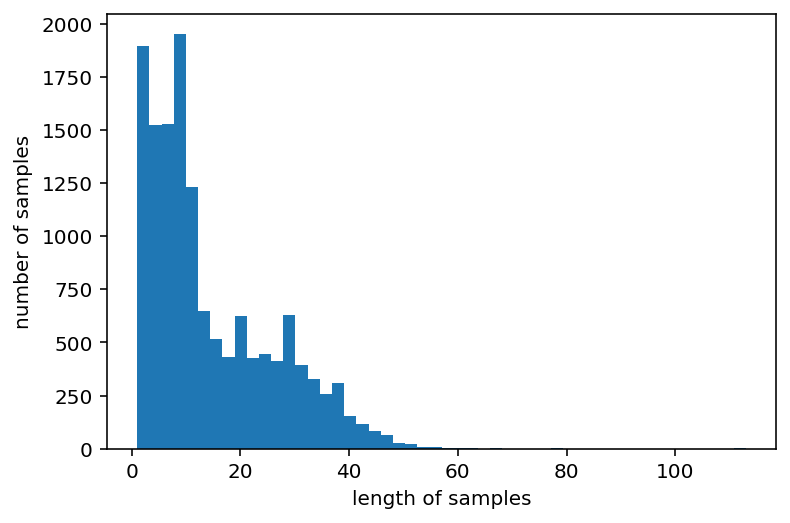

In [ ]:
print('샘플의 최대 길이 : %d' % max(len(l) for l in sentences))
print('샘플의 평균 길이 : %f' % (sum(map(len, sentences))/len(sentences)))
plt.hist([len(s) for s in sentences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
max_words = 4000
src_tokenizer = Tokenizer(num_words=max_words, oov_token='OOV')
src_tokenizer.fit_on_texts(sentences)

tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(ner_tags)
vocab_size = max_words
tag_size = len(tar_tokenizer.word_index) + 1
print('단어 집합의 크기 : {}'.format(vocab_size))
print('개체명 태깅 정보 집합의 크기 : {}'.format(tag_size))

단어 집합의 크기 : 4000
개체명 태깅 정보 집합의 크기 : 10


In [ ]:
X_train = src_tokenizer.texts_to_sequences(sentences)
y_train = tar_tokenizer.texts_to_sequences(ner_tags)
print(X_train[0])
print(y_train[0])

[989, 1, 205, 629, 7, 3939, 216, 1, 3]
[4, 1, 7, 1, 1, 1, 7, 1, 1]


In [ ]:
index_to_word = src_tokenizer.index_word
index_to_ner = tar_tokenizer.index_word

decoded = []
for index in X_train[0] : # 첫번째 샘플 안의 인덱스들에 대해서
    decoded.append(index_to_word[index]) # 다시 단어로 변환

print('기존 문장 : {}'.format(sentences[0]))
print('빈도수가 낮은 단어가 OOV 처리된 문장 : {}'.format(decoded))

기존 문장 : ['eu', 'rejects', 'german', 'call', 'to', 'boycott', 'british', 'lamb', '.']
빈도수가 낮은 단어가 OOV 처리된 문장 : ['eu', 'OOV', 'german', 'call', 'to', 'boycott', 'british', 'OOV', '.']


In [ ]:
max_len = 70
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
# X_train의 모든 샘플들의 길이를 맞출 때 뒤의 공간에 숫자 0으로 채움.
y_train = pad_sequences(y_train, padding='post', maxlen=max_len)
# y_train의 모든 샘플들의 길이를 맞출 때 뒤의 공간에 숫자0으로 채움.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.3, random_state=77)
y_train = to_categorical(y_train, num_classes=tag_size)
y_test = to_categorical(y_test, num_classes=tag_size)

In [ ]:
print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (9828, 70)
훈련 샘플 레이블의 크기 : (9828, 70, 10)
테스트 샘플 문장의 크기 : (4213, 70)
테스트 샘플 레이블의 크기 : (4213, 70, 10)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, TimeDistributed
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len, mask_zero=True))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(TimeDistributed(Dense(tag_size, activation='softmax')))

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.001),
              metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=128, epochs=8,  validation_data=(X_test, y_test))

Epoch 1/8
77/77 [==============================] - 4s 49ms/step - loss: 0.1970 - accuracy: 0.1804 - val_loss: 0.1401 - val_accuracy: 0.1723
Epoch 2/8
77/77 [==============================] - 2s 26ms/step - loss: 0.1113 - accuracy: 0.1748 - val_loss: 0.0860 - val_accuracy: 0.1797
Epoch 3/8
77/77 [==============================] - 2s 26ms/step - loss: 0.0734 - accuracy: 0.1846 - val_loss: 0.0630 - val_accuracy: 0.1876
Epoch 4/8
77/77 [==============================] - 2s 26ms/step - loss: 0.0535 - accuracy: 0.1913 - val_loss: 0.0490 - val_accuracy: 0.1926
Epoch 5/8
77/77 [==============================] - 2s 26ms/step - loss: 0.0406 - accuracy: 0.1954 - val_loss: 0.0400 - val_accuracy: 0.1955
Epoch 6/8
77/77 [==============================] - 2s 27ms/step - loss: 0.0325 - accuracy: 0.1977 - val_loss: 0.0361 - val_accuracy: 0.1965
Epoch 7/8
77/77 [==============================] - 2s 27ms/step - loss: 0.0271 - accuracy: 0.1992 - val_loss: 0.0340 - val_accuracy: 0.1968
Epoch 8/8
77/77 [===

In [ ]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

132/132 [==============================] - 1s 5ms/step - loss: 0.0341 - accuracy: 0.1972

 테스트 정확도: 0.1972


In [ ]:
i=15
y_predicted = model.predict(np.array([X_test[i]])) # 입력한 테스트용 샘플에 대해서 예측 y를 리턴
y_predicted = np.argmax(y_predicted, axis=-1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.
true = np.argmax(y_test[i], -1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for w, t, pred in zip(X_test[i], true, y_predicted[0]):
    if w != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[w], index_to_ner[t].upper(), index_to_ner[pred].upper()))

단어             |실제값  |예측값
-----------------------------------
16               : O       O
-                : O       O
cedric           : B-PER   B-PER
pioline          : I-PER   I-PER
(                : O       O
france           : B-LOC   B-LOC
)                : O       O
beat             : O       O
francisco        : B-PER   B-PER
OOV              : I-PER   I-PER
(                : O       O
spain            : B-LOC   B-LOC
)                : O       O
6-4              : O       O
7-6              : O       O
(                : O       O
7-3              : O       O
)                : O       O
6-4              : O       O


# import

In [ ]:
from __future__ import unicode_literals
from __future__ import print_function

import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import keras
import re
import tensorflow
from keras.datasets import mnist
from keras import backend as K
from keras.callbacks import TensorBoard
from collections import namedtuple

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Bidirectional, TimeDistributed, Dropout, Bidirectional, Conv2D, MaxPooling2D, Flatten, Layer
from tensorflow.keras.optimizers import Adam
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report

from keras_contrib.layers import CRF
from keras_contrib.losses import crf_loss
from keras_contrib.metrics import crf_viterbi_accuracy
%matplotlib inline
%config InlineBackend.figure_format='retina'

Using TensorFlow backend.


# 국립국어원 말뭉치 사용 분류기 TEST


In [ ]:
Candidate = namedtuple('Candidate', ['lemma', 'tag', 'is_ps'])

devjson = json.load(open('./NEtaggedCorpus_train.json'))
sentence = devjson.get('sentence')
len(sentence[0].get('morp'))

20

In [ ]:
trancedata = []
temptrance = []
for morp in sentence:
  for lentyp in morp.get('morp'):
    temptrance.append([lentyp.get('lemma'),lentyp.get('type')])
  trancedata.append(temptrance)
  temptrance=[]

print("변환 셈플 수 : ", len(trancedata))
print(trancedata[0])

변환 셈플 수 :  3555
[['한편', 'NNG'], [',', 'SP'], ['AFC', 'SL'], ['챔피언스', 'NNG'], ['리그', 'NNG'], ['E', 'SL'], ['조', 'NNG'], ['에', 'JKB'], ['속하', 'VV'], ['ㄴ', 'ETM'], ['포항', 'NNP'], ['역시', 'MAJ'], ['대회', 'NNG'], ['8강', 'NNG'], ['진출', 'NNG'], ['이', 'JKS'], ['불투명', 'NNG'], ['하', 'VV'], ['다', 'EC'], ['.', 'SF']]


In [ ]:
samplemorp, sampletags = [], [] 
for trancedataT in trancedata: # 14,041개의 문장 샘플을 1개씩 불러온다.
    samplemorpT, sampletagsT = zip(*trancedataT) # 각 샘플에서 단어들은 sentence에 개체명 태깅 정보들은 tag_info에 저장.
    samplemorp.append(list(samplemorpT)) # 각 샘플에서 단어 정보만 저장한다.
    sampletags.append(list(sampletagsT)) # 각 샘플에서 개체명 태깅 정보만 저장한다.

In [ ]:
print(samplemorp[0])
print(sampletags[0])

['한편', ',', 'AFC', '챔피언스', '리그', 'E', '조', '에', '속하', 'ㄴ', '포항', '역시', '대회', '8강', '진출', '이', '불투명', '하', '다', '.']
['NNG', 'SP', 'SL', 'NNG', 'NNG', 'SL', 'NNG', 'JKB', 'VV', 'ETM', 'NNP', 'MAJ', 'NNG', 'NNG', 'NNG', 'JKS', 'NNG', 'VV', 'EC', 'SF']


샘플의 최대 길이 : 168
샘플의 평균 길이 : 34.038819


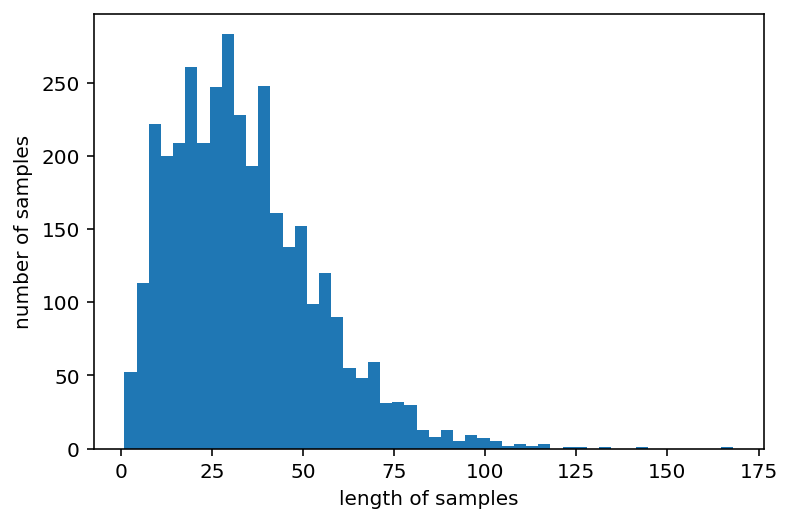

In [ ]:
print('샘플의 최대 길이 : %d' % max(len(l) for l in samplemorp))
print('샘플의 평균 길이 : %f' % (sum(map(len, samplemorp))/len(samplemorp)))
plt.hist([len(s) for s in samplemorp], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
max_words = 40000
src_tokenizer = Tokenizer(num_words=max_words, oov_token='OOV')
src_tokenizer.fit_on_texts(samplemorp)

tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(sampletags)

In [ ]:
vocab_size = max_words
tag_size = len(tar_tokenizer.word_index) + 1
print('단어 집합의 크기 : {}'.format(vocab_size))
print('개체명 태깅 정보 집합의 크기 : {}'.format(tag_size))

단어 집합의 크기 : 40000
개체명 태깅 정보 집합의 크기 : 46


In [ ]:
X_train = src_tokenizer.texts_to_sequences(samplemorp)
y_train = tar_tokenizer.texts_to_sequences(sampletags)
print(X_train[0])
print(y_train[0])

[183, 11, 4276, 884, 162, 931, 402, 10, 2608, 7, 1516, 608, 145, 1361, 414, 4, 6347, 2, 8, 3]
[1, 16, 19, 1, 1, 19, 1, 6, 3, 7, 4, 33, 1, 1, 1, 15, 1, 3, 2, 11]


In [ ]:
index_to_word = src_tokenizer.index_word
index_to_ner = tar_tokenizer.index_word

decoded = []
for index in X_train[0] : # 첫번째 샘플 안의 인덱스들에 대해서
    decoded.append(index_to_word[index]) # 다시 단어로 변환

print('기존 문장 : {}'.format(samplemorp[0]))
print('빈도수가 낮은 단어가 OOV 처리된 문장 : {}'.format(decoded))

기존 문장 : ['한편', ',', 'AFC', '챔피언스', '리그', 'E', '조', '에', '속하', 'ㄴ', '포항', '역시', '대회', '8강', '진출', '이', '불투명', '하', '다', '.']
빈도수가 낮은 단어가 OOV 처리된 문장 : ['한편', ',', 'afc', '챔피언스', '리그', 'e', '조', '에', '속하', 'ㄴ', '포항', '역시', '대회', '8강', '진출', '이', '불투명', '하', '다', '.']


In [ ]:
max_len = 125
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
# X_train의 모든 샘플들의 길이를 맞출 때 뒤의 공간에 숫자 0으로 채움.
y_train = pad_sequences(y_train, padding='post', maxlen=max_len)
# y_train의 모든 샘플들의 길이를 맞출 때 뒤의 공간에 숫자0으로 채움.
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.2, random_state=7)

In [ ]:
y_train = to_categorical(y_train, num_classes=tag_size)
y_test = to_categorical(y_test, num_classes=tag_size)

In [ ]:
print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (2844, 125)
훈련 샘플 레이블의 크기 : (2844, 125, 46)
테스트 샘플 문장의 크기 : (711, 125)
테스트 샘플 레이블의 크기 : (711, 125, 46)


LSTM 모델

In [ ]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=128, input_length=max_len, mask_zero=True))
model.add(Bidirectional(LSTM(256, return_sequences=True)))
model.add(TimeDistributed(Dense(tag_size, activation='softmax')))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(0.001),
              metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, batch_size=128, epochs=25,  validation_data=(X_test, y_test))

Epoch 1/25
23/23 [==============================] - 4s 179ms/step - loss: 0.8754 - accuracy: 0.1093 - val_loss: 0.7599 - val_accuracy: 0.0887
Epoch 2/25
23/23 [==============================] - 2s 69ms/step - loss: 0.7323 - accuracy: 0.0865 - val_loss: 0.7096 - val_accuracy: 0.0887
Epoch 3/25
23/23 [==============================] - 2s 69ms/step - loss: 0.6654 - accuracy: 0.0894 - val_loss: 0.6084 - val_accuracy: 0.0962
Epoch 4/25
23/23 [==============================] - 2s 70ms/step - loss: 0.4833 - accuracy: 0.1390 - val_loss: 0.3516 - val_accuracy: 0.1855
Epoch 5/25
23/23 [==============================] - 2s 70ms/step - loss: 0.2419 - accuracy: 0.2129 - val_loss: 0.1828 - val_accuracy: 0.2267
Epoch 6/25
23/23 [==============================] - 2s 70ms/step - loss: 0.1315 - accuracy: 0.2366 - val_loss: 0.1265 - val_accuracy: 0.2391
Epoch 7/25
23/23 [==============================] - 2s 70ms/step - loss: 0.0876 - accuracy: 0.2492 - val_loss: 0.0995 - val_accuracy: 0.2454
Epoch 8/25
2

In [ ]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

23/23 [==============================] - 0s 9ms/step - loss: 0.0768 - accuracy: 0.2537

 테스트 정확도: 0.2537


In [ ]:
i=100 # 확인하고 싶은 테스트용 샘플의 인덱스.
y_predicted = model.predict(np.array([X_test[i]])) # 입력한 테스트용 샘플에 대해서 예측 y를 리턴
y_predicted = np.argmax(y_predicted, axis=-1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.
true = np.argmax(y_test[i], -1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for w, t, pred in zip(X_test[i], true, y_predicted[0]):
    if w != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[w], index_to_ner[t].upper(), index_to_ner[pred].upper()))

LSTM+CRF

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

In [ ]:
model= tfSequential()
model.add(Embedding(input_dim=vocab_size, output_dim=20, input_length=max_len))
model.add(Bidirectional(LSTM(units=50, return_sequences=True, recurrent_dropout=0.25)))
model.add(TimeDistributed(Dense(50, activation="relu")))
crf = CRF(tag_size)
model.add(crf)

ModuleNotFoundError: ignored

In [ ]:
model.compile(optimizer="rmsprop", loss=crf.loss_function, metrics=[crf.accuracy]) # rmsprop
history = model.fit(X_train, y_train, batch_size=36, epochs=20, validation_split=0.2, verbose=1)

NameError: ignored

In [ ]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

711/711 [==============================] - 5s 6ms/step

 테스트 정확도: 0.9757


In [ ]:
i=21 # 확인하고 싶은 테스트용 샘플의 인덱스.
y_predicted = model.predict(np.array([X_test[i]])) # 입력한 테스트용 샘플에 대해서 예측 y를 리턴
y_predicted = np.argmax(y_predicted, axis=-1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.
true = np.argmax(y_test[i], -1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for w, t, pred in zip(X_test[i], true, y_predicted[0]):
    if w != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[w], index_to_ner[t], index_to_ner[pred]))

단어             |실제값  |예측값
-----------------------------------
현재               : mag     nng
양준혁              : nnp     nnp
은                : jx      jx
331              : sn      mag
개                : nnb     nnb
,                : sp      sp
심정수              : nnp     nnp
는                : jx      jx
326              : sn      nnp
개                : nnb     nnb
를                : jko     jko
기록               : nng     nng
중                : nnb     nnb
이                : vcp     vcp
다                : ec      ec
.                : sf      sf


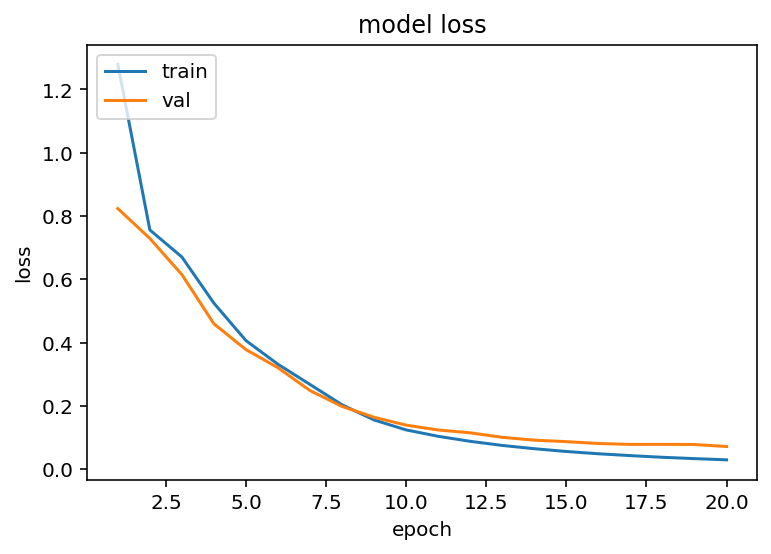

In [ ]:
epochs = range(1, len(history.history['val_loss']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

F1평가

In [ ]:
def sequences_to_tag(sequences): # 예측값을 index_to_tag를 사용하여 태깅 정보로 변경하는 함수.
    result = []
    for sequence in sequences: # 전체 시퀀스로부터 시퀀스를 하나씩 꺼낸다.
        temp = []
        for pred in sequence: # 시퀀스로부터 예측값을 하나씩 꺼낸다.
            pred_index = np.argmax(pred) # 예를 들어 [0, 0, 1, 0 ,0]라면 1의 인덱스인 2를 리턴한다.
            temp.append(index_to_ner[pred_index +1])
#           temp.append(index_to_ner[pred_index].replace("PAD", "O")) # 'PAD'는 'O'로 변경
        result.append(temp)
    return result

In [ ]:
y_predicted = model.predict(X_test)
pred_tags = sequences_to_tag(y_predicted)
test_tags = sequences_to_tag(y_test)
print(pred_tags)
print(test_tags)

[['ec', 'jkg', 'sn', 'ec', 'etm', 'ep', 'sn', 'ec', 'sp', 'ec', 'sn', 'ef', 'ec', 'ss', 'nnp', 'vv', 'xsn', 'ec', 'ss', 'jkb', 'sf', 'jkb', 'etm', 'nnp', 'vv', 'jkb', 'ec', 'etm', 'nnp', 'jks', 'vv', 'xsv', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng', 'nng'], ['xsn', 'ec', 'sn', 'sn', 'ec', 'ep', 'sf', 'ec', 'ec', 'etm', 'ec', 'vx', 'ec', 'ec', 'xr', 'ec', 'jx', 'nnb', 'jko', 'nnp', 'nnb', 'ec', 'e

In [ ]:
from seqeval.metrics import precision_score, recall_score, f1_score, classification_report

print(classification_report(test_tags, pred_tags))

print("F1-score: {:.1%}".format(f1_score(test_tags, pred_tags)))

           precision    recall  f1-score   support

       sf       0.95      1.00      0.97       793
      jkb       0.99      0.91      0.95      1154
       sl       0.74      0.68      0.71       365
       vv       0.90      0.91      0.91      1420
      vcp       0.92      0.93      0.92       310
       ec       0.83      0.83      0.83      4819
      mag       0.97      0.96      0.97       274
       sp       0.94      0.99      0.96       503
       jx       0.90      0.95      0.92       753
      nnb       0.99      0.97      0.98      1029
       sn       0.59      0.67      0.63      1176
      xsv       1.00      1.00      1.00       759
      nng       1.00      1.00      1.00       709
       ep       0.94      0.97      0.95       730
      etm       0.95      0.98      0.96      1069
       ef       0.98      1.00      0.99       372
      jks       1.00      0.99      0.99       544
       np       0.80      0.87      0.83        75
      xsn       0.68      0.64

새로운 입력 예측하기

In [ ]:
word_to_index = src_tokenizer.word_index
new_sentence='한글 입력에 대한 모델의 예측값을 기대해봄l'.split()

In [ ]:
new_X=[]
for w in new_sentence:
    try:
      new_X.append(word_to_index.get(w,1))
    except KeyError:
      new_X.append(word_to_index['OOV'])
      # 모델이 모르는 단어에 대해서는 'OOV'의 인덱스인 1로 인코딩

print(new_X)

[5989, 1, 2573, 1, 1, 1]


In [ ]:
pad_new = pad_sequences([new_X], padding="post", value=0, maxlen=max_len)

In [ ]:
p = model.predict(np.array([pad_new[0]]))
p = np.argmax(p, axis=-1)
print("{:15}||{}".format("단어", "예측값"))
print(30 * "=")
for w, pred in zip(new_sentence, p[0]):
    print("{:15}: {:5}".format(w, index_to_ner[pred]))

단어             ||예측값
한글             : nnp  
입력에            : nnp  
대한             : nnp  
모델의            : nng  
예측값을           : nng  
기대해봄l          : nng  


# [말뭉치 모음](https://comeng.tistory.com/entry/%EB%A7%90%EB%AD%89%EC%B9%98-%EB%A7%81%ED%81%AC-%EB%AA%A8%EC%9D%8C)

말뭉치를 NER 데이터 셋으로 사용하여야 함

spacy 에서는 한국어 모델은 아직 지원하지 않음



In [ ]:
import spacy
nlp = spacy.load('en')
doc = nlp(u'Microsoft has offices all over Europe.')
for ent in doc.ents:
  print(ent.text, ent.start_char, ent.end_char, ent.label_)

Microsoft 0 9 ORG
Europe 31 37 LOC


soynlp를 사용한 한국어 처리

In [ ]:
!pip install soynlp

     |████████████████████████████████| 419kB 1.4MB/s 


In [ ]:
from soynlp.noun import LRNounExtractor
noun_extractor = LRNounExtractor()
nouns = noun_extractor.train_extract(sentences) # list of str like

from soynlp.noun import NewsNounExtractor
noun_extractor = NewsNounExtractor()
nouns = noun_extractor.train_extract(sentences) # list of str like

[Noun Extractor] used default noun predictor; Sejong corpus predictor
[Noun Extractor] used noun_predictor_sejong
[Noun Extractor] All 2398 r features was loaded


TypeError: ignored

참고 : https://lovit.github.io/

soynlp pos Tagging 예제

In [ ]:
pos_dict = {
    'Adverb': {'너무', '매우'}, 
    'Noun': {'너무너무너무', '아이오아이', '아이', '노래', '오', '이', '고양'},
    'Josa': {'는', '의', '이다', '입니다', '이', '이는', '를', '라', '라는'},
    'Verb': {'하는', '하다', '하고'},
    'Adjective': {'예쁜', '예쁘다'},
    'Exclamation': {'우와'}    
}

from soynlp.postagger import Dictionary
from soynlp.postagger import LRTemplateMatcher
from soynlp.postagger import LREvaluator
from soynlp.postagger import SimpleTagger
from soynlp.postagger import UnknowLRPostprocessor

dictionary = Dictionary(pos_dict)
generator = LRTemplateMatcher(dictionary)    
evaluator = LREvaluator()
postprocessor = UnknowLRPostprocessor()
tagger = SimpleTagger(generator, evaluator, postprocessor)

sent = '너무너무너무는아이오아이의노래입니다!!'
print(tagger.tag(sent))
# [('너무너무너무', 'Noun'),
#  ('는', 'Josa'),
#  ('아이오아이', 'Noun'),
#  ('의', 'Josa'),
#  ('노래', 'Noun'),
#  ('입니다', 'Josa'),
#  ('!!', None)]

[('너무너무너무', 'Noun'), ('는', 'Josa'), ('아이오아이', 'Noun'), ('의', 'Josa'), ('노래', 'Noun'), ('입니다', 'Josa'), ('!!', None)]


# NER 

In [ ]:
text = open('./ner_train_data.txt','rt')

In [ ]:
tagged_sentences = []
sentence = []

for line in text:
    if len(line)==0 or line.startswith('-DOCSTART') or line[0]=="\n":
        if len(sentence) > 0:
            tagged_sentences.append(sentence)
            sentence = []
        continue
    splits = line.split(' ') # 공백을 기준으로 속성을 구분한다.
    splits[-1] = re.sub(r'\n', '', splits[-1]) # 줄바꿈 표시 \n을 제거한다.
    splits = splits[-1].split('\t')
    if splits[2]=='-':
      splits[2] = 'O'
    sentence.append([splits[1], splits[2]]) # 단어와 개체명 태깅만 기록한다.

In [ ]:
print(tagged_sentences[0])

[['비토리오', 'PER_B'], ['양일', 'DAT_B'], ['만에', 'O'], ['영사관', 'ORG_B'], ['감호', 'CVL_B'], ['용퇴,', 'O'], ['항룡', 'O'], ['압력설', 'O'], ['의심만', 'O'], ['가율', 'O']]


In [ ]:
sentences, ner_tags = [], [] 
for tagged_sentence in tagged_sentences: # 14,041개의 문장 샘플을 1개씩 불러온다.
    sentence, tag_info = zip(*tagged_sentence) # 각 샘플에서 단어들은 sentence에 개체명 태깅 정보들은 tag_info에 저장.
    sentences.append(list(sentence)) # 각 샘플에서 단어 정보만 저장한다.
    ner_tags.append(list(tag_info)) # 각 샘플에서 개체명 태깅 정보만 저장한다.
  
print(sentences[0])
print(ner_tags[0])
print(sentences[12])
print(ner_tags[12]) 

['비토리오', '양일', '만에', '영사관', '감호', '용퇴,', '항룡', '압력설', '의심만', '가율']
['PER_B', 'DAT_B', 'O', 'ORG_B', 'CVL_B', 'O', 'O', 'O', 'O', 'O']
['옥구권에서', '2홀', '돌', '소요액이면', '제주에서', '23홀도', '가능하다는', '얘기다', '.']
['LOC_B', 'NUM_B', 'O', 'O', 'LOC_B', 'NUM_B', 'O', 'O', 'O']


샘플의 최대 길이 : 175
샘플의 평균 길이 : 11.817456


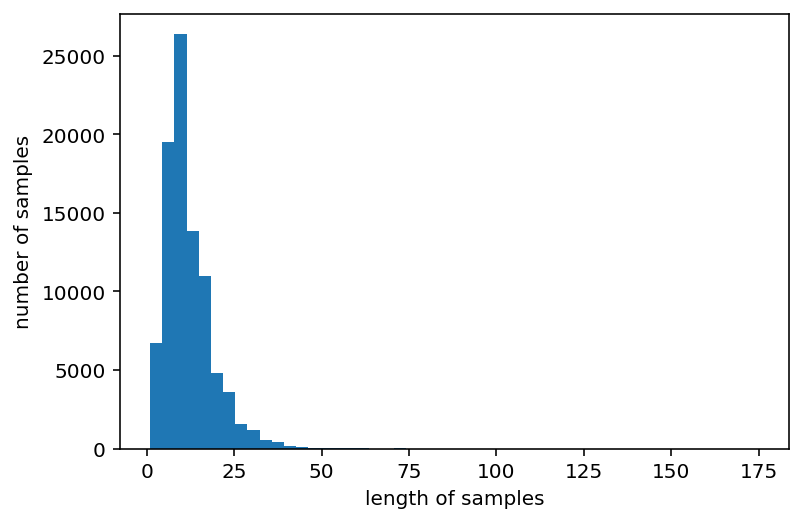

In [ ]:
print('샘플의 최대 길이 : %d' % max(len(l) for l in sentences))
print('샘플의 평균 길이 : %f' % (sum(map(len, sentences))/len(sentences)))
plt.hist([len(s) for s in sentences], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
max_words = 40000
src_tokenizer = Tokenizer(num_words=max_words, oov_token='OOV')
src_tokenizer.fit_on_texts(sentences)

tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(ner_tags)
vocab_size = max_words
tag_size = len(tar_tokenizer.word_index) + 1
print('단어 집합의 크기 : {}'.format(vocab_size))
print('개체명 태깅 정보 집합의 크기 : {}'.format(tag_size))

단어 집합의 크기 : 40000
개체명 태깅 정보 집합의 크기 : 30


In [ ]:
X_train = src_tokenizer.texts_to_sequences(sentences)
y_train = tar_tokenizer.texts_to_sequences(ner_tags)
print(X_train[0])
print(y_train[0])

[1, 7771, 85, 1, 17739, 1, 26418, 1, 1, 35258]
[4, 6, 1, 5, 2, 1, 1, 1, 1, 1]


In [ ]:
index_to_word = src_tokenizer.index_word
index_to_ner = tar_tokenizer.index_word

decoded = []
for index in X_train[0] : # 첫번째 샘플 안의 인덱스들에 대해서
    decoded.append(index_to_word[index]) # 다시 단어로 변환

print('기존 문장 : {}'.format(sentences[0]))
print('빈도수가 낮은 단어가 OOV 처리된 문장 : {}'.format(decoded))

기존 문장 : ['비토리오', '양일', '만에', '영사관', '감호', '용퇴,', '항룡', '압력설', '의심만', '가율']
빈도수가 낮은 단어가 OOV 처리된 문장 : ['OOV', '양일', '만에', 'OOV', '감호', 'OOV', '항룡', 'OOV', 'OOV', '가율']


In [ ]:
max_len = 70
X_train = pad_sequences(X_train, padding='post', maxlen=max_len)
# X_train의 모든 샘플들의 길이를 맞출 때 뒤의 공간에 숫자 0으로 채움.
y_train = pad_sequences(y_train, padding='post', maxlen=max_len)
# y_train의 모든 샘플들의 길이를 맞출 때 뒤의 공간에 숫자0으로 채움.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=.3, random_state=77)
y_train = to_categorical(y_train, num_classes=tag_size)
y_test = to_categorical(y_test, num_classes=tag_size)
print('훈련 샘플 문장의 크기 : {}'.format(X_train.shape))
print('훈련 샘플 레이블의 크기 : {}'.format(y_train.shape))
print('테스트 샘플 문장의 크기 : {}'.format(X_test.shape))
print('테스트 샘플 레이블의 크기 : {}'.format(y_test.shape))

훈련 샘플 문장의 크기 : (63000, 70)
훈련 샘플 레이블의 크기 : (63000, 70, 30)
테스트 샘플 문장의 크기 : (27000, 70)
테스트 샘플 레이블의 크기 : (27000, 70, 30)


In [ ]:
model= Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=200,
                    input_length=max_len))
model.add(Bidirectional(LSTM(units=50,
                             return_sequences=True,
                             recurrent_dropout=0.5)))
model.add(TimeDistributed(Dense(50,
                                activation="relu")))
crf = CRF(tag_size)   #tensorflow 2.0 에서는 에러 남
model.add(crf)

In [ ]:
model.compile(optimizer="adam", loss=crf.loss_function, metrics=[crf.accuracy]) # rmsprop
history = model.fit(X_train, y_train, batch_size=256, epochs=30, validation_split=0.4, verbose=1)

In [ ]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

27000/27000 [==============================] - 36s 1ms/step

 테스트 정확도: 0.9665


In [ ]:
i=5 # 확인하고 싶은 테스트용 샘플의 인덱스.
y_predicted = model.predict(np.array([X_test[i]])) # 입력한 테스트용 샘플에 대해서 예측 y를 리턴
y_predicted = np.argmax(y_predicted, axis=-1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.
true = np.argmax(y_test[i], -1) # 원-핫 인코딩을 다시 정수 인코딩으로 변경함.

print("{:15}|{:5}|{}".format("단어", "실제값", "예측값"))
print(35 * "-")

for w, t, pred in zip(X_test[i], true, y_predicted[0]):
    if w != 0: # PAD값은 제외함.
        print("{:17}: {:7} {}".format(index_to_word[w], index_to_ner[t], index_to_ner[pred]))

단어             |실제값  |예측값
-----------------------------------
텔레비전             : trm_b   trm_b
OOV              : o       o
옆에               : o       o
팀에               : o       o
OOV              : cvl_b   o
있는가              : o       o
.                : o       o


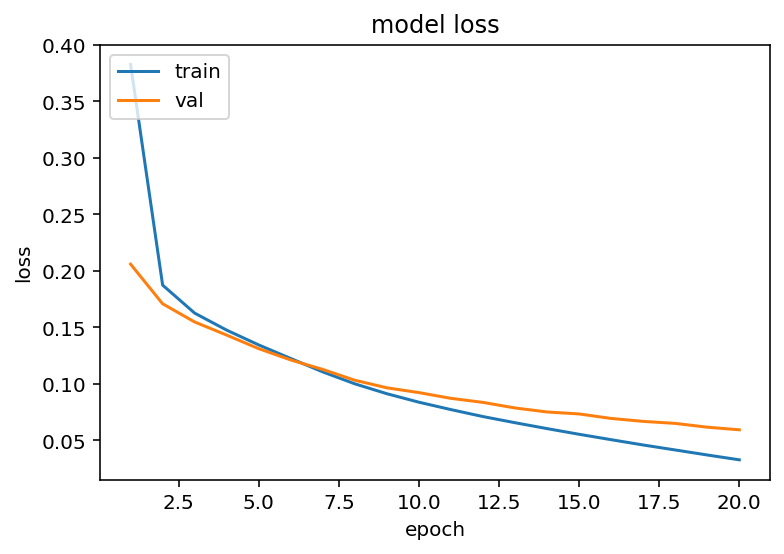

In [ ]:
epochs = range(1, len(history.history['val_loss']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
y_predicted = model.predict(X_test)
pred_tags = sequences_to_tag(y_predicted)
test_tags = sequences_to_tag(y_test)
print(pred_tags)
print(test_tags)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
print(classification_report(test_tags, pred_tags))
print("F1-score: {:.1%}".format(f1_score(test_tags, pred_tags)))

           precision    recall  f1-score   support

        o       1.00      1.00      1.00     26987
    cvl_b       0.52      0.43      0.47     63758
    org_b       0.44      0.41      0.43     12131
    loc_b       0.91      0.76      0.83      7562
    num_b       0.41      0.30      0.35     16062
    dat_b       0.70      0.41      0.52     11457
    tim_i       0.10      0.08      0.09       328
    per_b       0.69      0.55      0.61     14876
    dat_i       0.62      0.69      0.65      2552
    per_i       0.28      0.27      0.28      1155
    trm_b       0.46      0.28      0.35      5492
    num_i       0.63      0.43      0.51      3223
    evt_b       0.67      0.36      0.46      5239
    trm_i       0.09      0.03      0.05       844
    fld_b       0.87      0.62      0.72       964
    org_i       0.16      0.21      0.18      1415
    anm_b       0.75      0.76      0.75      2098
    cvl_i       0.53      0.19      0.28      1263
    anm_i       0.00      0.00

In [ ]:
word_to_index = src_tokenizer.word_index
new_sentence='웹에서 그림을 축소,확대,이동 기능을 구현이 될까요?(가능은 하겠지요..ㅎㅎ..)..어렵지 않을까요?'.split()

new_X=[]
for w in new_sentence:
    try:
      new_X.append(word_to_index.get(w,1))
    except KeyError:
      new_X.append(word_to_index['OOV'])
      # 모델이 모르는 단어에 대해서는 'OOV'의 인덱스인 1로 인코딩

print(new_X)

[1, 1, 1, 7062, 62223, 1, 1, 1]


In [ ]:
pad_new = pad_sequences([new_X], padding="post", value=0, maxlen=max_len)

In [ ]:
p = model.predict(np.array([pad_new[0]]))
p = np.argmax(p, axis=-1)
print("{:15}||{}".format("단어", "예측값"))
print(30 * "=")
for w, pred in zip(new_sentence, p[0]):
    print("{:15}: {:5}".format(w, index_to_ner[pred]))

InvalidArgumentError: ignored

# AI API·DATA 서비스를 통한 언어분석

In [ ]:
import urllib3
import json
 
openApiURL = "http://aiopen.etri.re.kr:8000/WiseNLU"
accessKey = "f79231f5-ff8f-4e8c-9f42-71baf556efa5"
analysisCode = "ner"
text = "한글 입력에 대한 모델의 예측값을 기대해봄!"
 
requestJson = {
    "access_key": accessKey,
    "argument": {
        "text": text,
        "analysis_code": analysisCode
    }
}
 
http = urllib3.PoolManager()
response = http.request(
    "POST",
    openApiURL,
    headers={"Content-Type": "application/json; charset=UTF-8"},
    body=json.dumps(requestJson)
)
 
print("[responseCode] " + str(response.status))
print("[responBody]")
print(str(response.data,"utf-8"))
                                        

[responseCode] 200
[responBody]
{"result":0,"return_object":{"doc_id":"","DCT":"","category":"","category_weight":0.0,"title":{"text":"","NE":""},"metaInfo":{},"paragraphInfo":[],"sentence":[{"id":0.0,"reserve_str":"","text":"한글 입력에 대한 모델의 예측값을 기대해봄!","morp":[{"id":0.0,"lemma":"한글","type":"NNG","position":0.0,"weight":0.426514},{"id":1.0,"lemma":"입력","type":"NNG","position":7.0,"weight":0.9},{"id":2.0,"lemma":"에","type":"JKB","position":13.0,"weight":0.153364},{"id":3.0,"lemma":"대하","type":"VV","position":17.0,"weight":0.444579},{"id":4.0,"lemma":"ㄴ","type":"ETM","position":20.0,"weight":0.304215},{"id":5.0,"lemma":"모델","type":"NNG","position":24.0,"weight":0.9},{"id":6.0,"lemma":"의","type":"JKG","position":30.0,"weight":0.0694213},{"id":7.0,"lemma":"예측값","type":"NNG","position":34.0,"weight":0.0},{"id":8.0,"lemma":"을","type":"JKO","position":43.0,"weight":0.129611},{"id":9.0,"lemma":"기대해봄","type":"VV","position":47.0,"weight":0.0},{"id":10.0,"lemma":"!","type":"SF","position":59.0,"we

#한국어 BERT 임베딩

In [ ]:
from models.word_eval import WordEmbeddingEval
model = WordEmbeddingEval(vecs_fname="word2vec_path", method="word2vec")
model.word_sim_test("data/kor_ws353.csv")
model.word_analogy_test("data/kor_analogy_semantic.txt")
model.word_analogy_test("data/kor_analogy_syntactic.txt")
model.most_similar("희망")
model.visualize_words("data/kor_analogy_semantic.txt", palette="Viridis256")
model.visualize_between_words("data/kor_analogy_semantic.txt", palette="Greys256")